In [6]:
from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
start="1949/5/16"

観測値yとxの関係を分析するために、yをxの一次式の形でとらえる方法があります。

y=α+βx

を回帰直線、α, βは回帰係数といいます。xはyの変動を説明するための変数で説明変数といい、yはその対象なので被説明変数となります。$x_i$ついてのyの予測値$\hat{y}_i$は

$\hat{y}_i=\hat{α}+\hat{β}x_i$

となります。$\hat{α}$、$\hat{β}$、はα, βの推定値です。予測値が観測値の動きをすべて説明できるわけではなく、yの変動を回帰直線で説明できない部分

$y_i-\hat{y}_i=\hat{ϵ}_i$

を残差といいます。α, βの推定値はこの残差$\hat{ϵ}_i$の平方和を最小にするように求めます。そのため$\hat{α}$、$\hat{β}$、は最小二乗推定値といいます。
- これらの推定値は観測値から計算され、簡単に手に入ります。
- これらは点推定です。
- 回帰直線は$y_i$と$x_i$の平均を通ります。


線形単回帰モデル

つぎに$Y_i$を確率変数として、その母集団を考え、そして母集団回帰式が成り立つとします。

$Y_i=α+βX_i+ϵ_i$

を設定します。これは母集団回帰式です。α, βは母数です。$X_i$はあらかじめ定められた固定値です。$X_i$ついてYの期待値を

$E(Y│X_i )=α+βX_i$

とします。E(|)は条件付き期待値です。これを線形回帰式といいます。E(|)は確定的(システマティック)な部分で理論値ともいいます。また、
$Y_i-E(Y|X_i)=ϵ_i$
となり、$ϵ_i$は確率的(非システマティック)な部分を表現しています。

6.1.1 確率的誤差項のもつ意味

　$ϵ_i$ はこのモデルでは説明できない部分です。ではなぜ$ϵ_i$が必要なのでしょうか。主に7つの理由があります。
- 理論のあいまいさ

Yの動きを説明する理論がまだ確立されていない。または理論で説明できない部分が残っている状態です。その説明できない部分をϵ_iで表現しています。
- データが提供されていない

説明できない部分を説明できる要因がなんであるかが分かっているのですが、そのデータが提供されていない状態です。

- 主変数とそれ以外の変数

いくつかの変数による影響が確率的な効果として表れています。

- 内在的な確率的要素

人の行動にはどうしても説明できない部分があります。ある程度は内在的な確率によって人の行動は支配されています。

- 代替変数と説明変数の差

線形回帰模型ではXもYもノイズの無い正確なデータであることが仮定されています。しかし、そのようはデータが手に入ることは稀です。したがって、代替変数を使います。たとえば月末のデータが欲しいのだが手に入らないので月初のデータを使う場合などです。

- 単純性の原理

回帰モデルを単純な形にしておきたい。オッカムの剃刀ともいわれます。


- 間違った関数形式

もともとのモデル自体に誤りがある。





確率的誤差項のもつ意味

　$ϵ_i$はこの模型では説明できない部分です。その必要性には、主に7つの理由があります。ここではドル円の為替レートの予測を考えてみます。

- 理論のあいまいさ

Yの動きを説明する理論がまだ確立されていない。または理論で説明できない部分が残っている状態です。その説明できない部分を$u_i$で表現しています。

$Y_i=u_i$

または

$Y_i=Y_{i-1}+u_i$

- データが提供されていない

説明できない部分を説明できる要因が生産者の購買価格と借入・預金金利であることはおおむね分かっているのですが、そのデータが提供されていない状態です。

$Y_i=f(X_i)+u_i$

- 主変数とそれ以外の変数

いくつかの変数による影響が確率的な効果として表れています。たとえば、消費者物価の影響は小さいと考え、u_iの中に入れてしまいます。

Y_i=〖f(X_i)+u〗_i

- 内在的な確率的要素

為替レートの価格の決定ですが、内在的な確率に支配された人の行動の影響を受けています。そのような確率的な要因をγ_iとすると

$Y_i=f(X_i)+γ_i+u_i$

- 代替変数の利用

線形回帰模型ではXもYもノイズの無い正確なデータであることが仮定されています。しかし、そのようはデータが手に入ることは稀です。したがって、代替変数を使います。各々の生産者の購買価格の代わりに、生産者物価指数(PPI)を使い、各々の生産者の借入、預入金利の代わりに米国２年物債券の金利(TB2)を使います。

$Y_i=PPI_i+TB2_i+γ_i+u_i$

- 単純性の原理

回帰モデルを単純な形にしておきたい。オッカムの剃刀ともいわれます。たとえば、米国２年物債券の金利は２年物米国債の価格に直した方が良いかもしれません。しかし、模型が複雑にならないように金利のまま用います。
理論模型としては

$Y_i=a+b∙PPI_i+c∙TB2_i+\hat{ϵ_i}$

または

$Y_i=a+Y_{i-1}+b∙PPI_i+c∙TB2_i+\hat{ϵ}_i$

予測模型

$Y_i=a+b∙PPI_{i-1}+c∙TB2_{i-1}+\hat{ϵ}_i$

または

$Y_i=a+Y_{i-1}+b∙PPI_{i-1}+c∙TB2_{i-1}+\hat{ϵ}_i$

または

$Y_i=a+Y_{i-1}+b∙(PPI_i-PPI_{i-1})+c∙(TB2_i-TB2_{i-1})+\hat{ϵ}_i$



PPIACO    742
dtype: int64

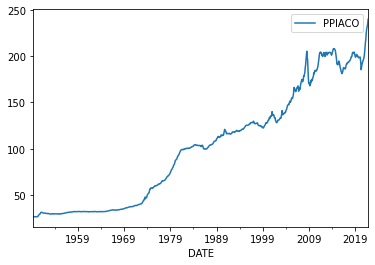

In [7]:
import pandas_datareader.data as web
usppi = web.DataReader("PPIACO", 'fred',start)#Population, Total for World
usppi.plot()
usppi.loc['1960/01':].count()

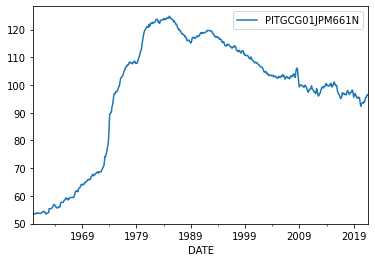

In [9]:
import pandas as pd
jppi = web.DataReader("PITGCG01JPM661N", 'fred',start)#Population, Total for World
jppi.plot()
ppi=pd.concat([usppi.loc['1960/01':],jppi],axis=1).dropna()

In [10]:
ppi['dif']=np.log(ppi.iloc[:,0]-np.log(ppi.iloc[:,1]))

In [11]:
ppi

,PPIACO,PITGCG01JPM661N,dif
DATE,,,
1960-01-01,31.6,53.765499,3.318372
1960-02-01,31.6,53.666846,3.318439
1960-03-01,31.8,53.568194,3.325721
1960-04-01,31.8,53.469542,3.325787
1960-05-01,31.7,53.469542,3.322186
...,...,...,...
2021-05-01,224.9,95.500000,5.395176
2021-06-01,228.9,96.100000,5.413139
2021-07-01,231.2,96.500000,5.423321


<AxesSubplot:xlabel='DATE'>

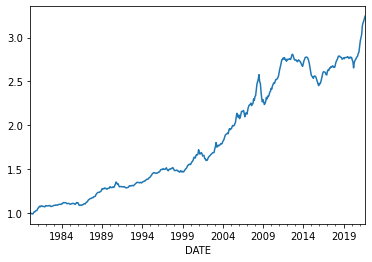

In [12]:
s=-500
us=(ppi.iloc[s:,0]/ppi.iloc[s,0])
jp=(ppi.iloc[s:,1]/ppi.iloc[s,1])
(us/jp).plot()

<AxesSubplot:xlabel='DATE'>

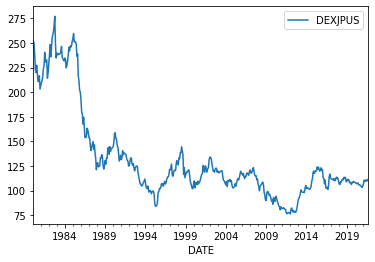

In [13]:
x = web.DataReader("DEXJPUS", 'fred',start)#
m=x.resample("M").last()
m.iloc[s-3:-3].plot()